In [115]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder


In [116]:
df = pd.read_csv('housing.csv')

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [118]:
df.dropna(inplace=True)

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [120]:
x = df.drop(['median_house_value'], axis=1)
y = df['median_house_value']

In [121]:
x

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


In [122]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

In [123]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [124]:
train_df = X_train.join(y_train)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

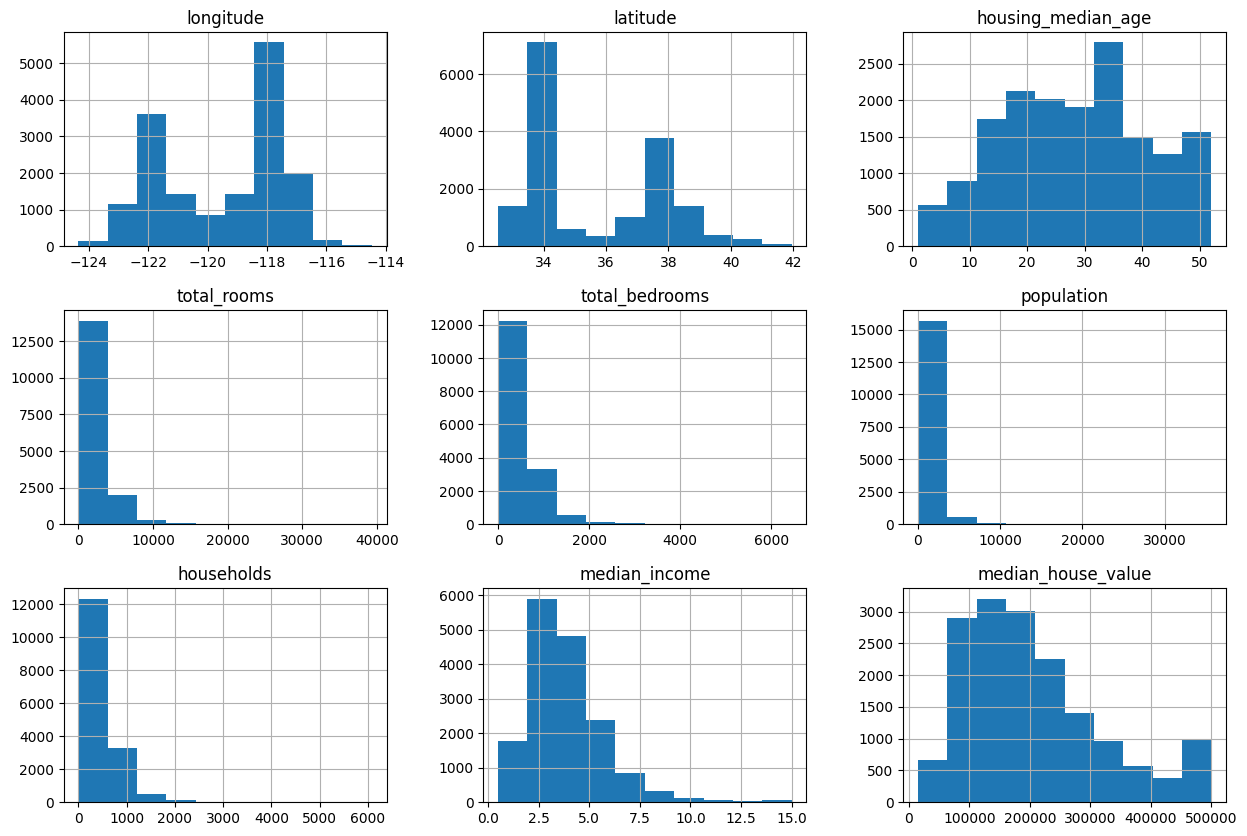

In [125]:
train_df.hist(figsize=(15,10))

In [126]:
train_df.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     7231
INLAND        5156
NEAR OCEAN    2114
NEAR BAY      1842
ISLAND           3
Name: count, dtype: int64

In [127]:
encoder = OneHotEncoder(dtype='float')
encoded_np = encoder.fit_transform(train_df[['ocean_proximity']]).toarray()
encoded_df = pd.DataFrame(encoded_np, columns=encoder.get_feature_names_out())
encoded_df.reset_index(drop=True, inplace=True)
encoded_df


,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,1.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...
16341,1.0,0.0,0.0,0.0,0.0
16342,1.0,0.0,0.0,0.0,0.0
16343,1.0,0.0,0.0,0.0,0.0
16344,0.0,0.0,0.0,1.0,0.0


In [128]:
train_df.reset_index(drop=True, inplace=True)
train_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-121.80,37.32,14.0,4412.0,924.0,2698.0,891.0,4.7027,<1H OCEAN,227600.0
1,-119.63,36.64,33.0,1036.0,181.0,620.0,174.0,3.4107,INLAND,110400.0
2,-118.06,34.12,25.0,3891.0,848.0,1848.0,759.0,3.6639,INLAND,248100.0
3,-118.31,34.07,28.0,2362.0,949.0,2759.0,894.0,2.2364,<1H OCEAN,305600.0
4,-117.27,33.04,27.0,1839.0,392.0,1302.0,404.0,3.5500,NEAR OCEAN,214600.0
...,...,...,...,...,...,...,...,...,...,...
16341,-117.97,33.72,24.0,2991.0,500.0,1437.0,453.0,5.4286,<1H OCEAN,273400.0
16342,-117.54,33.76,5.0,5846.0,1035.0,3258.0,1001.0,4.7965,<1H OCEAN,160800.0
16343,-118.42,34.01,42.0,1594.0,369.0,952.0,362.0,3.0990,<1H OCEAN,335400.0
16344,-122.04,37.57,12.0,5719.0,1064.0,3436.0,1057.0,5.2879,NEAR BAY,231200.0


In [129]:
train_df = train_df.join(encoded_df).drop(['ocean_proximity'], axis=1)
train_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-121.80,37.32,14.0,4412.0,924.0,2698.0,891.0,4.7027,227600.0,1.0,0.0,0.0,0.0,0.0
1,-119.63,36.64,33.0,1036.0,181.0,620.0,174.0,3.4107,110400.0,0.0,1.0,0.0,0.0,0.0
2,-118.06,34.12,25.0,3891.0,848.0,1848.0,759.0,3.6639,248100.0,0.0,1.0,0.0,0.0,0.0
3,-118.31,34.07,28.0,2362.0,949.0,2759.0,894.0,2.2364,305600.0,1.0,0.0,0.0,0.0,0.0
4,-117.27,33.04,27.0,1839.0,392.0,1302.0,404.0,3.5500,214600.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16341,-117.97,33.72,24.0,2991.0,500.0,1437.0,453.0,5.4286,273400.0,1.0,0.0,0.0,0.0,0.0
16342,-117.54,33.76,5.0,5846.0,1035.0,3258.0,1001.0,4.7965,160800.0,1.0,0.0,0.0,0.0,0.0
16343,-118.42,34.01,42.0,1594.0,369.0,952.0,362.0,3.0990,335400.0,1.0,0.0,0.0,0.0,0.0
16344,-122.04,37.57,12.0,5719.0,1064.0,3436.0,1057.0,5.2879,231200.0,0.0,0.0,0.0,1.0,0.0


In [130]:
train_df.count()

longitude                     16346
latitude                      16346
housing_median_age            16346
total_rooms                   16346
total_bedrooms                16346
population                    16346
households                    16346
median_income                 16346
median_house_value            16346
ocean_proximity_<1H OCEAN     16346
ocean_proximity_INLAND        16346
ocean_proximity_ISLAND        16346
ocean_proximity_NEAR BAY      16346
ocean_proximity_NEAR OCEAN    16346
dtype: int64

<Axes: >

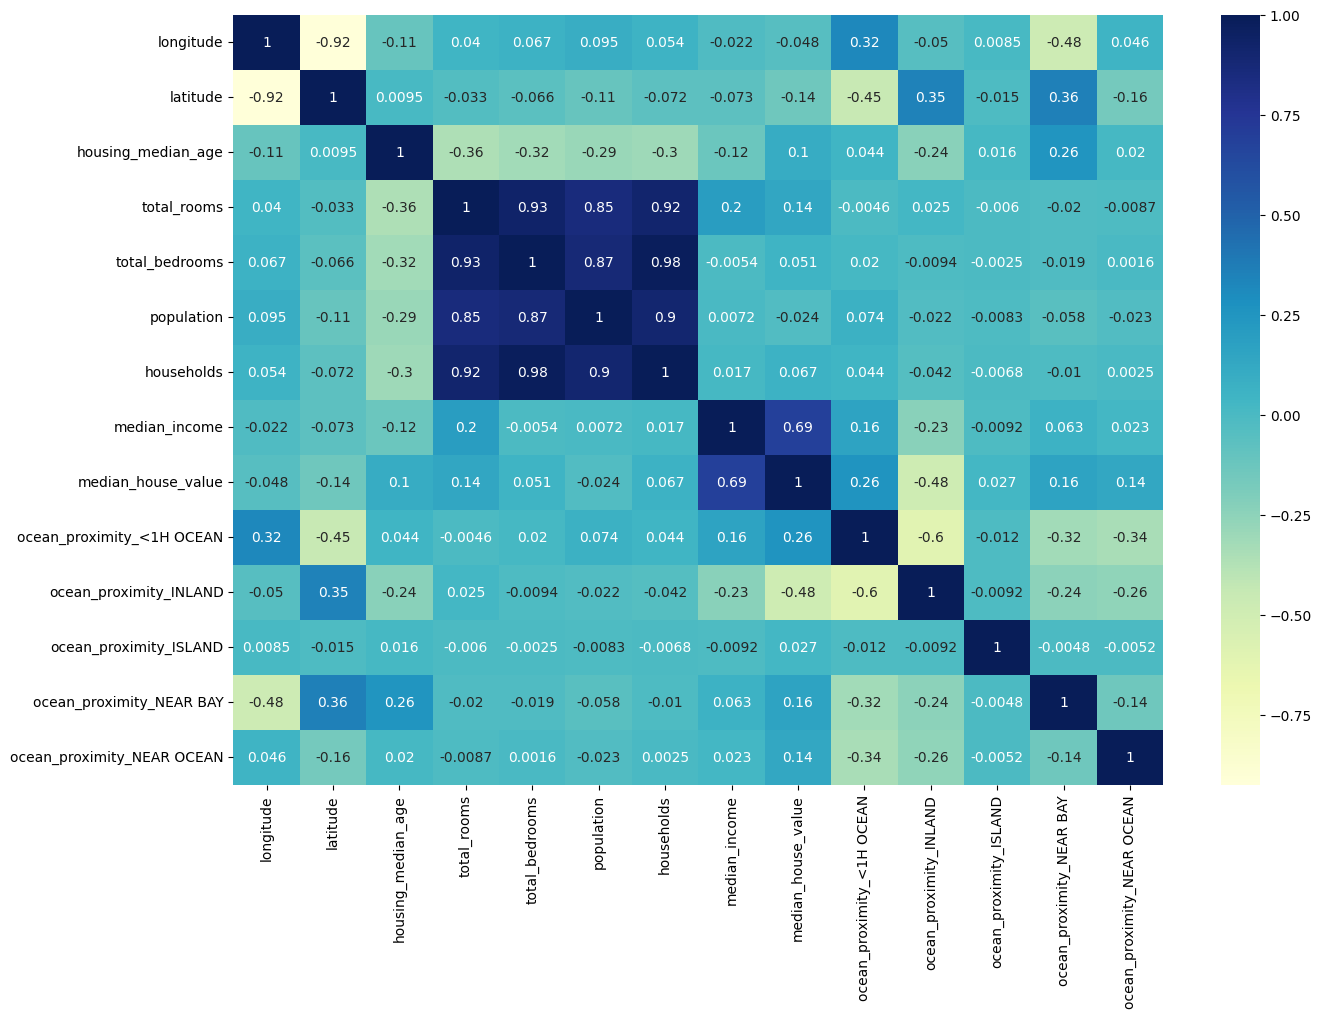

In [131]:
plt.figure(figsize=(15,10))
sns.heatmap(train_df.corr(), annot=True, cmap="YlGnBu")

In [132]:
train_df['bedroom_ratio'] = train_df['total_bedrooms'] / train_df['total_rooms']
train_df['household_rooms'] = train_df['total_rooms'] / train_df['households']

In [133]:
train_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,bedroom_ratio,household_rooms
0,-121.80,37.32,14.0,4412.0,924.0,2698.0,891.0,4.7027,227600.0,1.0,0.0,0.0,0.0,0.0,0.209429,4.951740
1,-119.63,36.64,33.0,1036.0,181.0,620.0,174.0,3.4107,110400.0,0.0,1.0,0.0,0.0,0.0,0.174710,5.954023
2,-118.06,34.12,25.0,3891.0,848.0,1848.0,759.0,3.6639,248100.0,0.0,1.0,0.0,0.0,0.0,0.217939,5.126482
3,-118.31,34.07,28.0,2362.0,949.0,2759.0,894.0,2.2364,305600.0,1.0,0.0,0.0,0.0,0.0,0.401778,2.642058
4,-117.27,33.04,27.0,1839.0,392.0,1302.0,404.0,3.5500,214600.0,0.0,0.0,0.0,0.0,1.0,0.213159,4.551980


<Axes: >

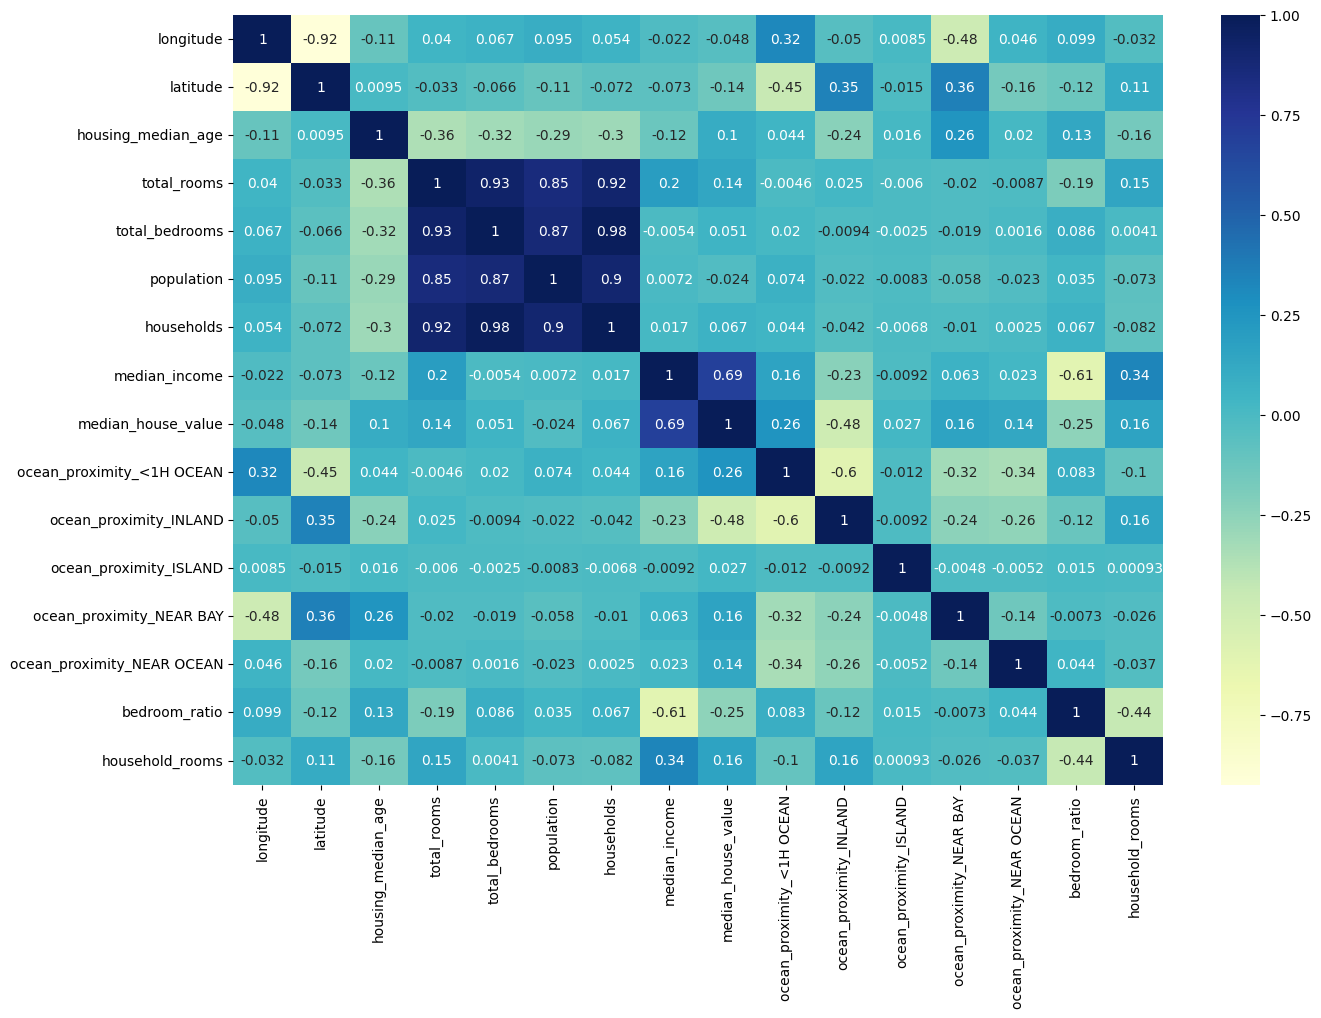

In [134]:
plt.figure(figsize=(15,10))
sns.heatmap(train_df.corr(), annot=True, cmap="YlGnBu")

In [135]:
X_train, y_train = train_df.drop(['median_house_value'], axis=1), train_df["median_house_value"]

In [137]:
lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression()

In [138]:
test_df = X_test.join(y_test)
test_df.reset_index(drop=True, inplace=True)
test_df


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-117.24,32.79,20.0,961.0,278.0,525.0,254.0,3.1838,NEAR OCEAN,245800.0
1,-121.29,38.01,2.0,6403.0,1116.0,3327.0,957.0,4.4871,INLAND,137900.0
2,-118.14,33.92,31.0,3731.0,853.0,2313.0,801.0,3.2237,<1H OCEAN,218200.0
3,-122.07,37.94,30.0,1260.0,276.0,707.0,221.0,2.8920,NEAR BAY,220800.0
4,-121.89,37.99,4.0,2171.0,597.0,928.0,461.0,4.1016,INLAND,170500.0
...,...,...,...,...,...,...,...,...,...,...
4082,-118.15,33.76,36.0,2916.0,785.0,1183.0,749.0,3.5985,NEAR OCEAN,500001.0
4083,-117.95,34.03,33.0,1782.0,394.0,1517.0,376.0,3.3389,<1H OCEAN,157900.0
4084,-119.03,35.32,12.0,2721.0,549.0,1294.0,523.0,2.5575,INLAND,100200.0
4085,-117.42,34.08,28.0,2300.0,419.0,1312.0,444.0,3.4844,INLAND,127700.0


In [139]:
encoded_np_test = encoder.fit_transform(test_df[['ocean_proximity']]).toarray()
encoded_test = pd.DataFrame(encoded_np, columns=encoder.get_feature_names_out())
encoded_test.reset_index(drop=True, inplace=True)
encoded_test

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,1.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...
16341,1.0,0.0,0.0,0.0,0.0
16342,1.0,0.0,0.0,0.0,0.0
16343,1.0,0.0,0.0,0.0,0.0
16344,0.0,0.0,0.0,1.0,0.0


In [140]:
test_df = test_df.join(encoded_test).drop(['ocean_proximity'], axis=1)
test_df['bedroom_ratio'] = test_df['total_bedrooms'] / test_df['total_rooms']
test_df['household_rooms'] = test_df['total_rooms'] / test_df['households']

In [141]:
X_test, y_test = test_df.drop(['median_house_value'], axis=1), test_df["median_house_value"]

In [142]:
lr.score(X_test, y_test)

c:\Users\True_\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


-8.823763174431455e+25

In [143]:

ridge_alphas = [1.0, 2.0, 3.0, 4.0, 5.0]
for alpha in ridge_alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    ridge_score = ridge.score(X_test, y_test)
    print(f"Ridge Regression Score (alpha={alpha}):", ridge_score)

Ridge Regression Score (alpha=1.0): 0.6152493351021691
Ridge Regression Score (alpha=2.0): 0.6151668921125033
Ridge Regression Score (alpha=3.0): 0.6150024845737412
Ridge Regression Score (alpha=4.0): 0.6147964093158138
Ridge Regression Score (alpha=5.0): 0.6145686915293787
